In [2]:
import numpy as np
%matplotlib inline

import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, \
                                    Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from IPython.display import YouTubeVideo
from PIL import Image

In [3]:


data = np.load('flatland_train.npz')
X = data['X']
y = data['y']

y[y != 0] -= 2    # Correct labels so that triangle is mapped to class 1
X = X / 255.      # Scale down to range [0, 1]

# Construct and train your model (don't forget train/test split and other tricks)
# model = ...

# Save the model and upload it to git
# model.save('model.h5')

In [4]:
pd.Series(y).value_counts()

1.0    2853
3.0    2137
2.0    1868
4.0    1761
0.0    1381
dtype: int64

In [5]:
model = Sequential()
model.add(Conv2D(10, kernel_size=(5, 5), padding='same', activation='relu', input_shape=[50, 50, 1]))
model.add(Conv2D(10, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 10)        260       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 10)        2510      
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 10)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 10)        0         
                                                                 
 flatten (Flatten)           (None, 1210)              0         
                                                                 
 dense (Dense)               (None, 20)                24220     
                                                        

In [6]:
loss = model.fit(X,
                y,
                epochs=50,
                batch_size=64,
                validation_split=0.2)

Epoch 1/50
125/125 [==============================] - 13s 10ms/step - loss: 1.3363 - accuracy: 0.4359 - val_loss: 1.1719 - val_accuracy: 0.4525
Epoch 2/50
125/125 [==============================] - 1s 7ms/step - loss: 1.1166 - accuracy: 0.5189 - val_loss: 1.0400 - val_accuracy: 0.5555
Epoch 3/50
125/125 [==============================] - 1s 7ms/step - loss: 1.0153 - accuracy: 0.5705 - val_loss: 0.9163 - val_accuracy: 0.6150
Epoch 4/50
125/125 [==============================] - 1s 7ms/step - loss: 0.8670 - accuracy: 0.6424 - val_loss: 0.7905 - val_accuracy: 0.6860
Epoch 5/50
125/125 [==============================] - 1s 7ms/step - loss: 0.7186 - accuracy: 0.7185 - val_loss: 0.5883 - val_accuracy: 0.7690
Epoch 6/50
125/125 [==============================] - 1s 7ms/step - loss: 0.6016 - accuracy: 0.7728 - val_loss: 0.4923 - val_accuracy: 0.8255
Epoch 7/50
125/125 [==============================] - 1s 8ms/step - loss: 0.4967 - accuracy: 0.8235 - val_loss: 0.4082 - val_accuracy: 0.8620
Epoc

In [10]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<Axes: >

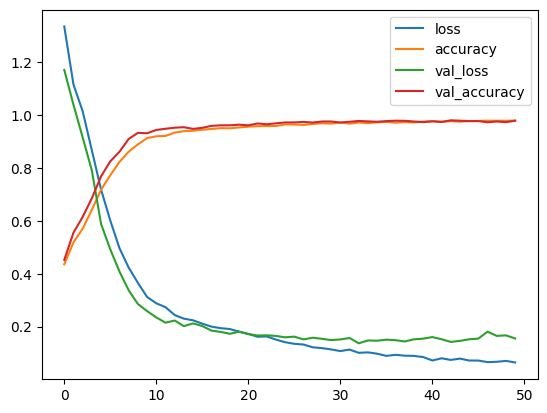

In [7]:
pd.DataFrame(loss.history).plot()